In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats
from scipy.stats import skew 
from sklearn.model_selection import KFold, RepeatedKFold,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data read from folder and display the sample of data
data = pd.read_csv(r"C:\Users\Kajal\Downloads\train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# data info for checking the datatype, null count and shape of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Checking null values
data_null = round((data.isna().sum()*100)/(data.shape[0]),2).reset_index()
data_null.columns =['column_name','null_perc']
data_null.sort_values('null_perc',ascending=False)

,column_name,null_perc
72,PoolQC,99.52
74,MiscFeature,96.30
6,Alley,93.77
73,Fence,80.75
57,FireplaceQu,47.26
...,...,...
27,ExterQual,0.00
24,Exterior2nd,0.00
23,Exterior1st,0.00
22,RoofMatl,0.00


In [8]:
#Dropping columns having more than 80% null values
null_cols = data_null[data_null['null_perc']>80]
null_cols

,column_name,null_perc
6,Alley,93.77
72,PoolQC,99.52
73,Fence,80.75
74,MiscFeature,96.30


In [10]:
data = data.drop(['Alley','PoolQC','MiscFeature','Fence'], axis=1)
data.shape

(1460, 77)

In [11]:
# missing value for categorical data

# Replacing NA with 'No Basement' for BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
data['BsmtQual'] = data['BsmtQual'].fillna('No Basement')
data['BsmtCond'] = data['BsmtCond'].fillna('No Basement')
data['BsmtExposure'] = data['BsmtExposure'].fillna('No Basement')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('No Basement')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('No Basement')

# Replacing NA with 'No Garage' for GarageType, GarageFinish, GarageQual, GarageCond
data['GarageType'] = data['GarageType'].fillna('No Garage')
data['GarageFinish'] = data['GarageFinish'].fillna('No Garage')
data['GarageQual'] = data['GarageQual'].fillna('No Garage')
data['GarageCond'] = data['GarageCond'].fillna('No Garage')

# Replacing NA with 'No Fireplace' for FireplaceQu
data['FireplaceQu'] = data['FireplaceQu'].fillna('No Fireplace')

# Replacing NA with 'None' for MasVnrType
data['MasVnrType'] = data['MasVnrType'].fillna('None')

# Replacing NA with mode value for Electrical
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [12]:
# missing value for numerical data

# Replacing NA with 0 for MasVnrArea as most of the values are 0 in this column
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

# Replacing NA with 0 for GarageYrBlt as there is 'No Garage' built and hence NA can be replaced by 0 
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

# for LotFrontage, if NA fill with median value
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())


In [13]:
# Drop Column Id

data = data.drop(['Id'], axis=1)
data.shape

(1460, 76)

In [14]:
#Calculate if any column having same value for 90% data

col = []
for i in data.columns:
    a = list(data[i].value_counts()>1360)
    if True in a:
        col.append(i)
print(col)     

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']


In [16]:
#extracting only numeric data from the list 
num_col = data[col].select_dtypes(include=np.number).columns.tolist()
num_col

['LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 '3SsnPorch',
 'PoolArea',
 'MiscVal']

In [17]:
#dropping columns having same value for 90% data
data = data.drop(num_col,axis=1)
data.shape

(1460, 70)

In [18]:
#CHecking for Duplicate
data_dup = data.duplicated()
print('Number of duplicate rows = %d' % (data_dup.sum()))
data[data_dup]

#No Duplicates found

Number of duplicate rows = 0


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [19]:
# Deriving a column for Age of the property
# Property_Age -  Property Age from yearsold - yearbuilt
data['Property_Age'] = (data['YrSold'] - data['YearBuilt'])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Property_Age
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,61,0,0,2,2008,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,298,0,0,0,5,2007,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,42,0,0,9,2008,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,35,272,0,2,2006,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,192,84,0,0,12,2008,WD,Normal,250000,8


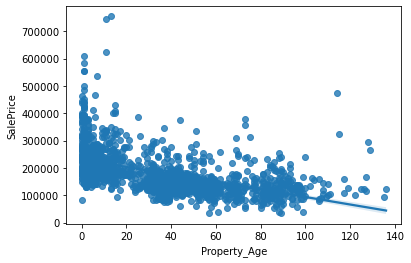

In [20]:
# Checking relationship between Property_Age and SalePrice
sns.regplot(x = data['Property_Age'], y = data['SalePrice'])
plt.show()

In [ ]:
#As the PropAge increases, the SalePrice of the house decreases i.e., newer the property, high is the price

In [21]:
#Dropping Unwanted Columns
data = data.drop(['MoSold'], axis = 1)
data = data.drop(['YrSold'], axis = 1)
data = data.drop(['YearBuilt'], axis = 1)
data = data.drop(['YearRemodAdd'], axis = 1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice,Property_Age
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,61,0,0,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,298,0,0,0,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,42,0,0,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,0,35,272,0,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,192,84,0,0,WD,Normal,250000,8


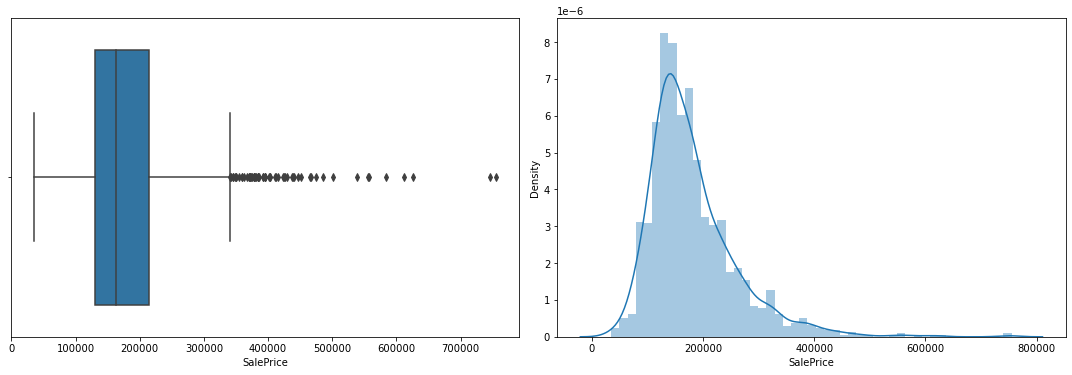

In [22]:
#Visualizing target variable before transformation

target_col = ['SalePrice']
c = 1  # initialize plot counter

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in target_col:
    plt.subplot(10, 2, c)
    plt.xlabel(i)
    sns.boxplot(data[i])
    c = c+1
    
    plt.subplot(10, 2, c)
    plt.xlabel(i)
    sns.distplot(data[i])
    c = c+1
    
plt.tight_layout()
plt.show()

In [ ]:
#It contains outliers and it is right skewed

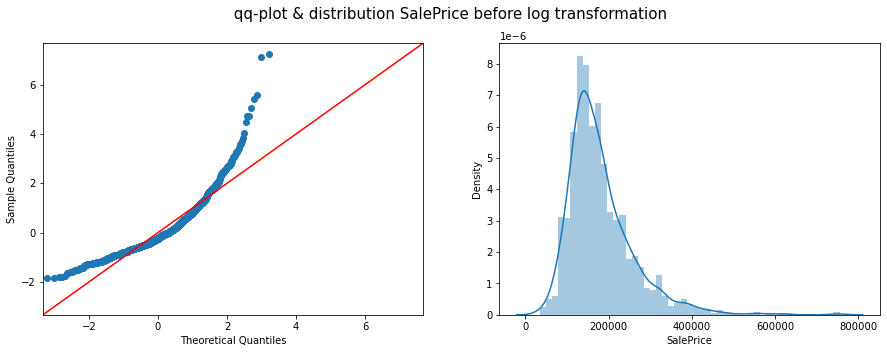

In [23]:
#before log transformation of SalePrice
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice before log transformation", fontsize= 15)

sm.qqplot(data['SalePrice'], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

sns.distplot(data['SalePrice'], kde = True, hist=True, ax = ax[1])
plt.show()

In [24]:
# log transformation
data['SalePrice'] = np.log(data['SalePrice'])

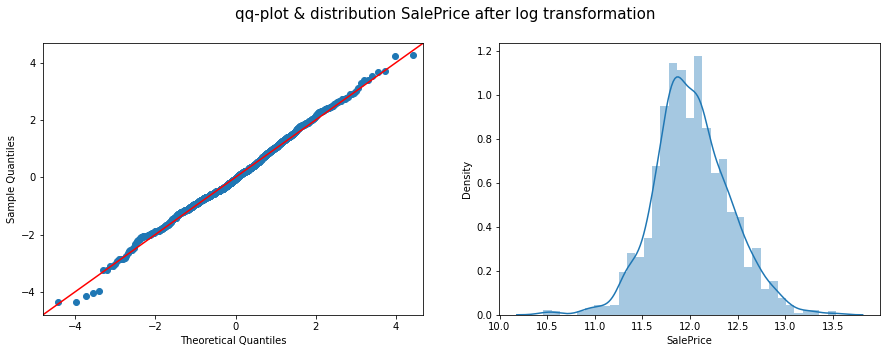

In [25]:
# after log transformation of SalePrice
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice after log transformation ", fontsize= 15)

sm.qqplot(data['SalePrice'] , stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(data['SalePrice'] , kde = True, hist=True, ax = ax[1])
plt.show()

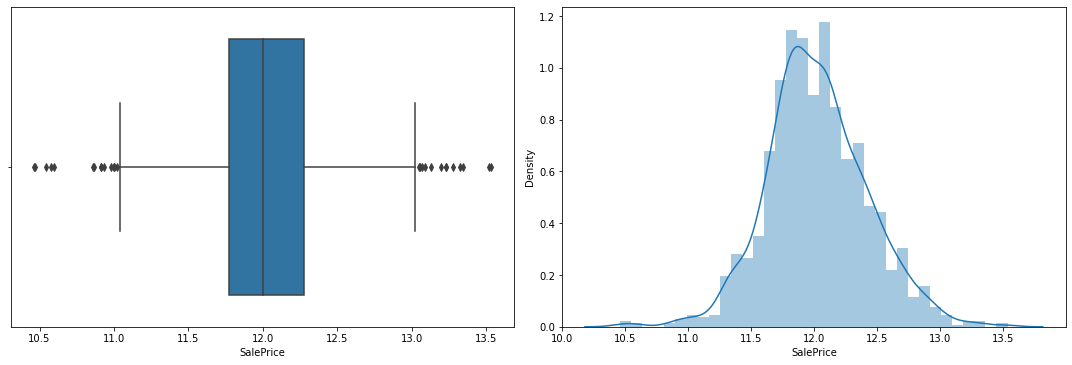

In [26]:
#Visualizing target variable again after transformation
target_col = ['SalePrice']
c = 1  # initialize plot counter

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in target_col:
    plt.subplot(10, 2, c)
    plt.xlabel(i)
    sns.boxplot(data[i])
    c = c+1
    
    plt.subplot(10, 2, c)
    plt.xlabel(i)
    sns.distplot(data[i])
    c = c+1
    
plt.tight_layout()
plt.show()

In [27]:
# After log transformation, target variable not skewed and is normally distributed

In [28]:
#Outliers Detection

# numeric columns
num_col = data.select_dtypes(include=np.number).columns.tolist()
num_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice',
 'Property_Age']

In [29]:
data_num = data[num_col]
data_num.shape


(1460, 28)

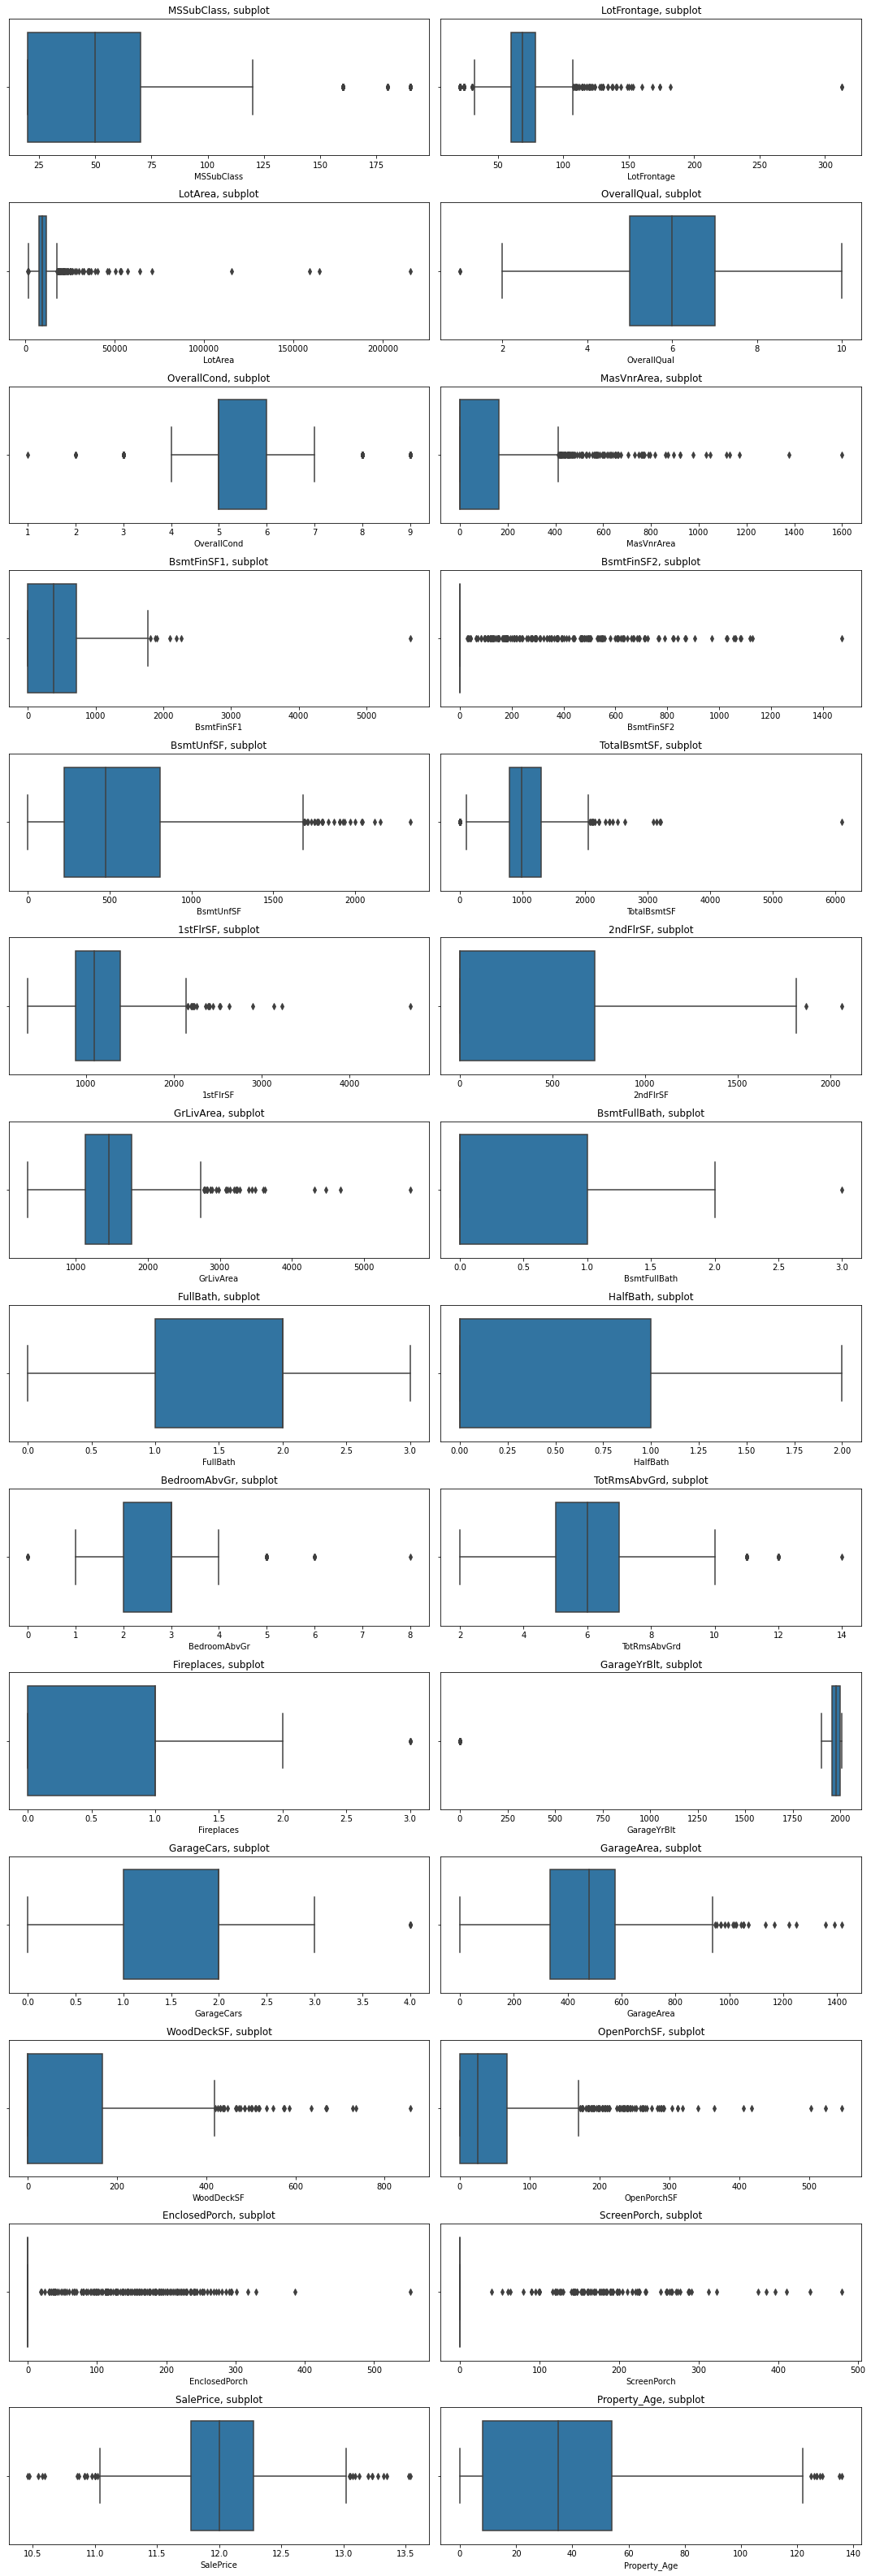

In [30]:
a = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in num_col:
    plt.subplot(16, 2, a)
    plt.title('{}, subplot'.format(i))
    plt.xlabel(i)
    sns.boxplot(data_num[i])
    a = a + 1
    plt.tight_layout()
plt.show()

In [ ]:
# Almost every variable contains outliers, we can see this from the plot
# Since dataset that we are working on is small, so its good to treat the outliers instead of removing them


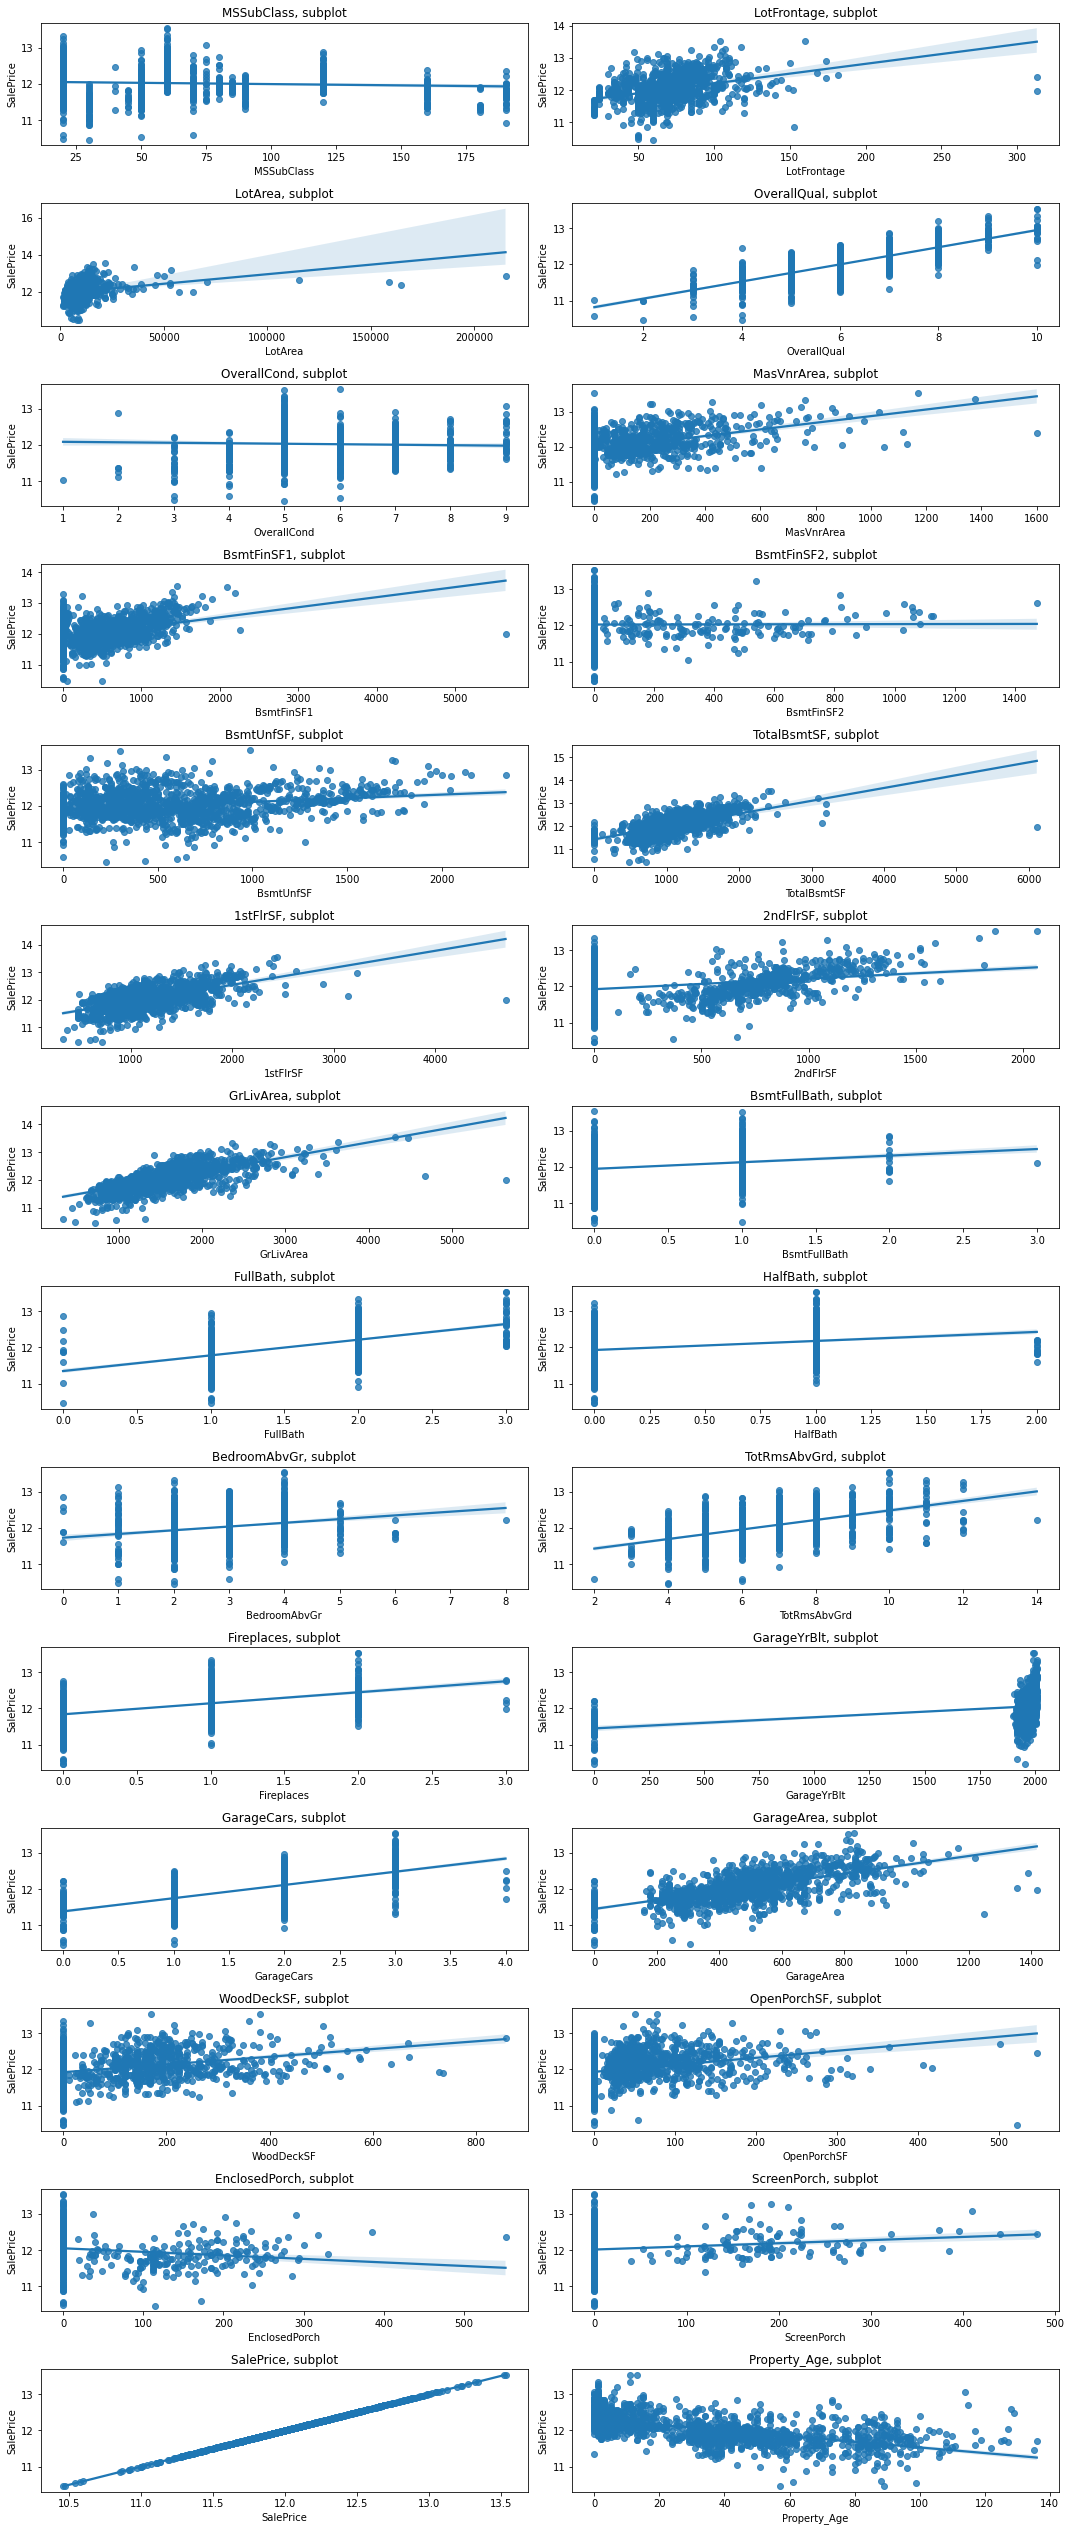

In [31]:
# Visualizing each variable against target variable SalePrice
a = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in num_col:
    plt.subplot(40, 2, a)
    plt.title('{}, subplot'.format(i))
    plt.xlabel(i)
    sns.regplot(data_num[i], data_num['SalePrice'])
    a = a + 1

plt.tight_layout()
plt.show();

In [ ]:
# We can see that the there is a skewness in the destribution
# Variables does not show any linear relation 

In [32]:
# Handling Skewness


num_skew = data_num.iloc[:,:-1].apply(lambda x: skew(x))
num_skew.sort_values(ascending=False)

LotArea          12.195142
BsmtFinSF2        4.250888
ScreenPorch       4.117977
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
BedroomAbvGr      0.211572
GarageArea        0.179796
SalePrice         0.121210
FullBath          0.036524
GarageCars       -0.342197
GarageYrBlt      -3.865524
dtype: float64

In [33]:
# handling variables having skewness more than 0.5 
high_skew = num_skew[num_skew > 0.5]
skew_index = high_skew.index
skew_index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'HalfBath', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch'],
      dtype='object')

In [34]:
# Applying Log Transformation on Hightly Skewd Variables

for i in skew_index:
    data[i] = np.log1p(data[i])
data_num.apply(lambda x: skew(x)).sort_values(ascending=False)

LotArea          12.195142
BsmtFinSF2        4.250888
ScreenPorch       4.117977
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
Property_Age      0.608404
BsmtFullBath      0.595454
OverallQual       0.216721
BedroomAbvGr      0.211572
GarageArea        0.179796
SalePrice         0.121210
FullBath          0.036524
GarageCars       -0.342197
GarageYrBlt      -3.865524
dtype: float64

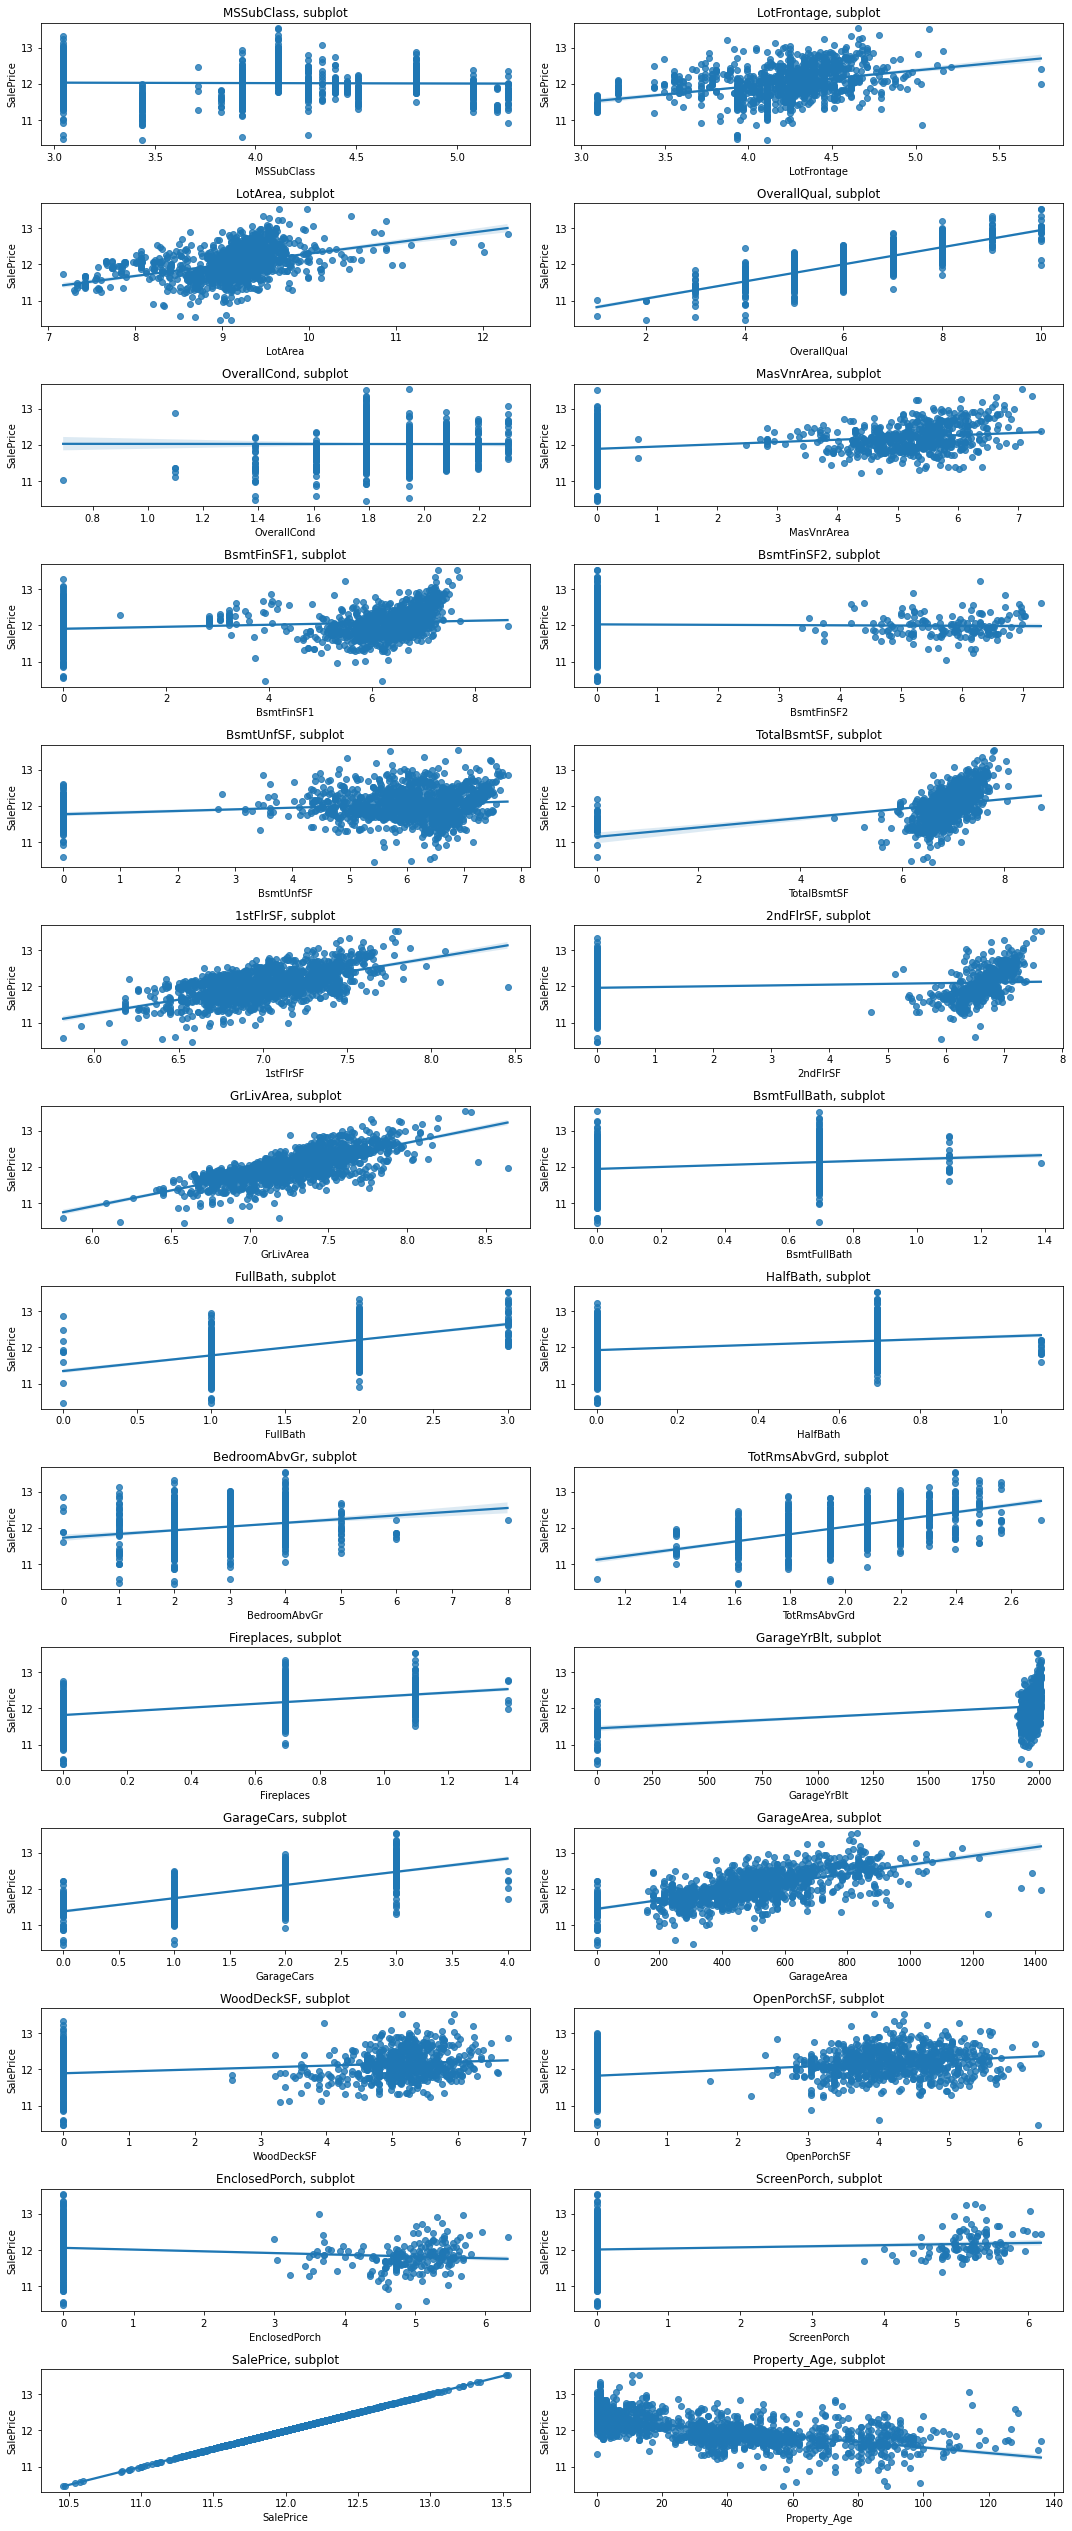

In [35]:
# Visualization after log transformation
a = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in num_col:
    plt.subplot(40, 2, a)
    plt.title('{}, subplot'.format(i))
    plt.xlabel(i)
    sns.regplot(data[i], data['SalePrice'])
    a = a + 1

plt.tight_layout()
plt.show();

In [ ]:
#After log transformation, we can see some linear trends now between numerical feature and target variable

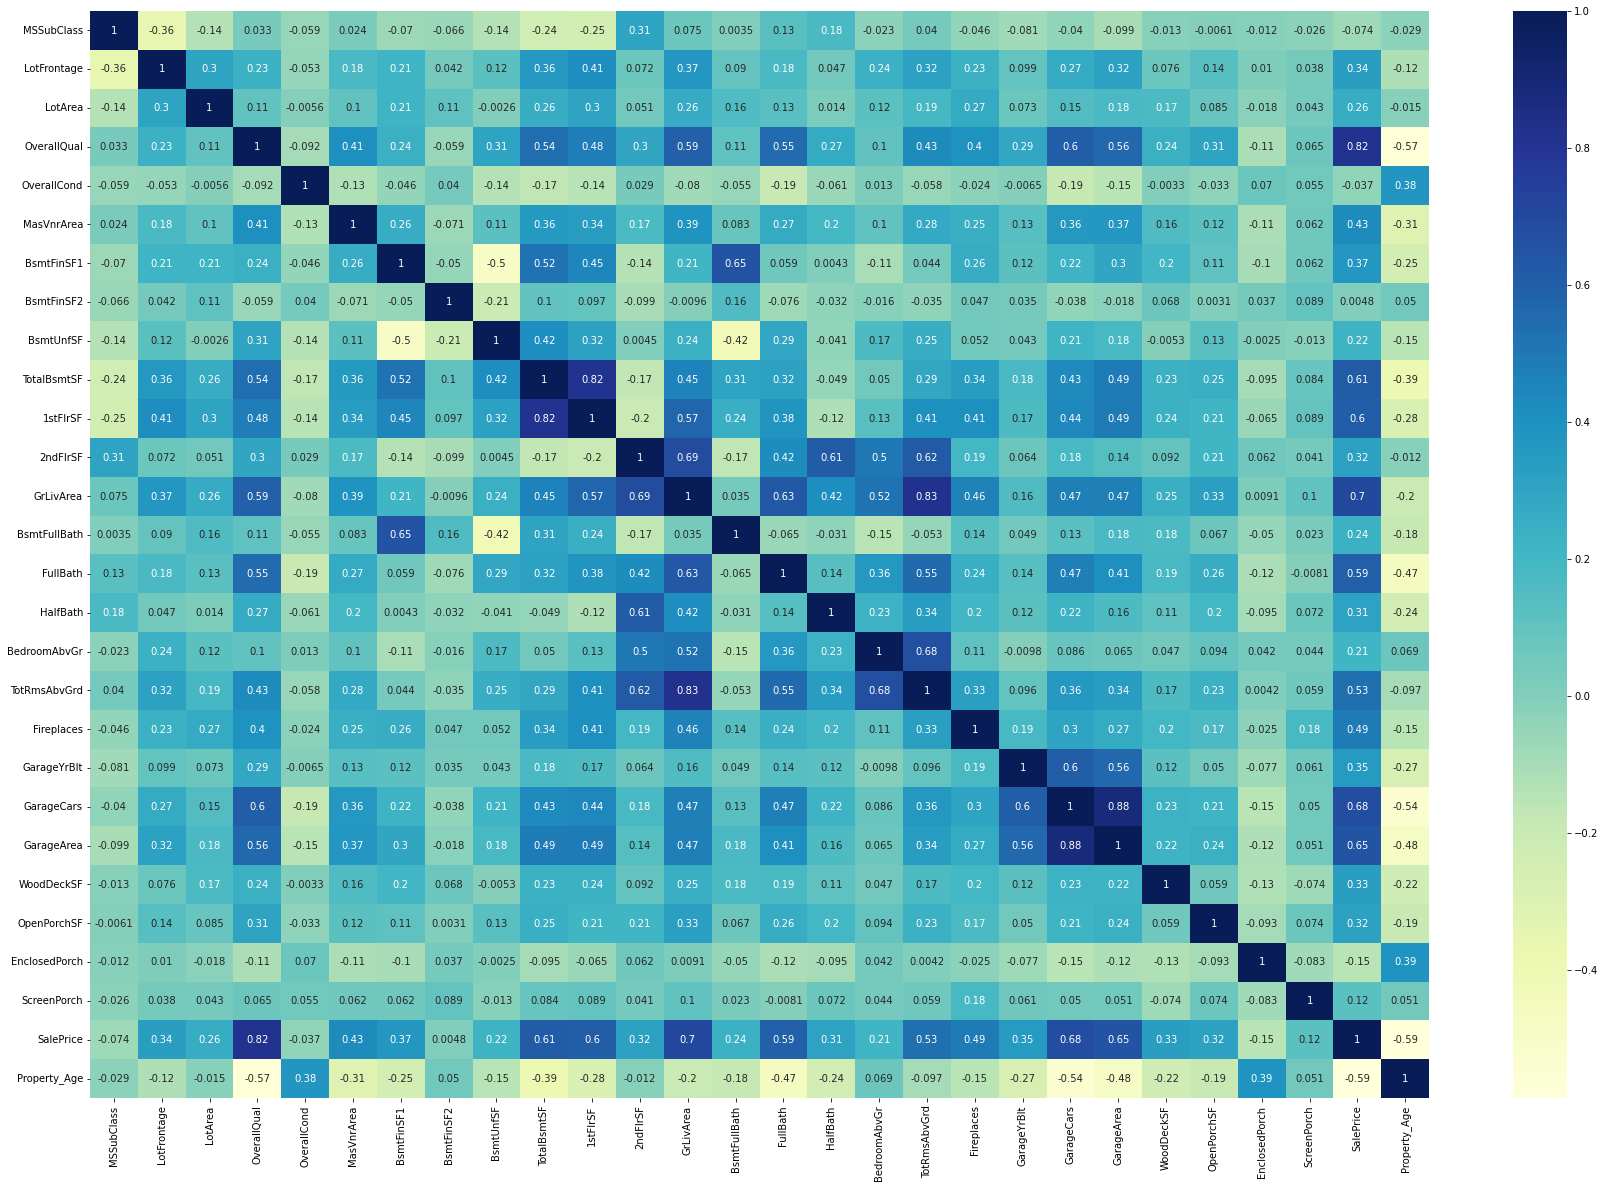

In [36]:
# Creating the heat map of numerical variable to check the correlation between them

plt.figure(figsize=(30,20))

sns.heatmap(data_num.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
# Features Highely Correlated with target variable : OverallQual, 1stFlrSF, GrLivArea, GarageCars, GarageArea etc.

In [ ]:
# Visualization on categotical variables

In [37]:
cat_col = data.select_dtypes(include=object).columns.tolist()

data_cat = data[cat_col]
data_cat.shape

(1460, 39)

In [38]:
# checking for null values in data_cat 
data_cat.isnull().sum().sort_values(ascending=False)

MSZoning         0
KitchenQual      0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
Functional       0
BsmtQual         0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
BsmtCond         0
Foundation       0
Street           0
Condition2       0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
ExterCond        0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
SaleCondition    0
dtype: int64

In [ ]:
# No Null Value found

In [39]:
# Adding Target variable
data_cat = pd.concat([data_cat,data_num[['SalePrice']]],axis=1)
data_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,WD,Normal,12.247694
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,12.109011
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,12.317167
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,11.849398
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,12.429216


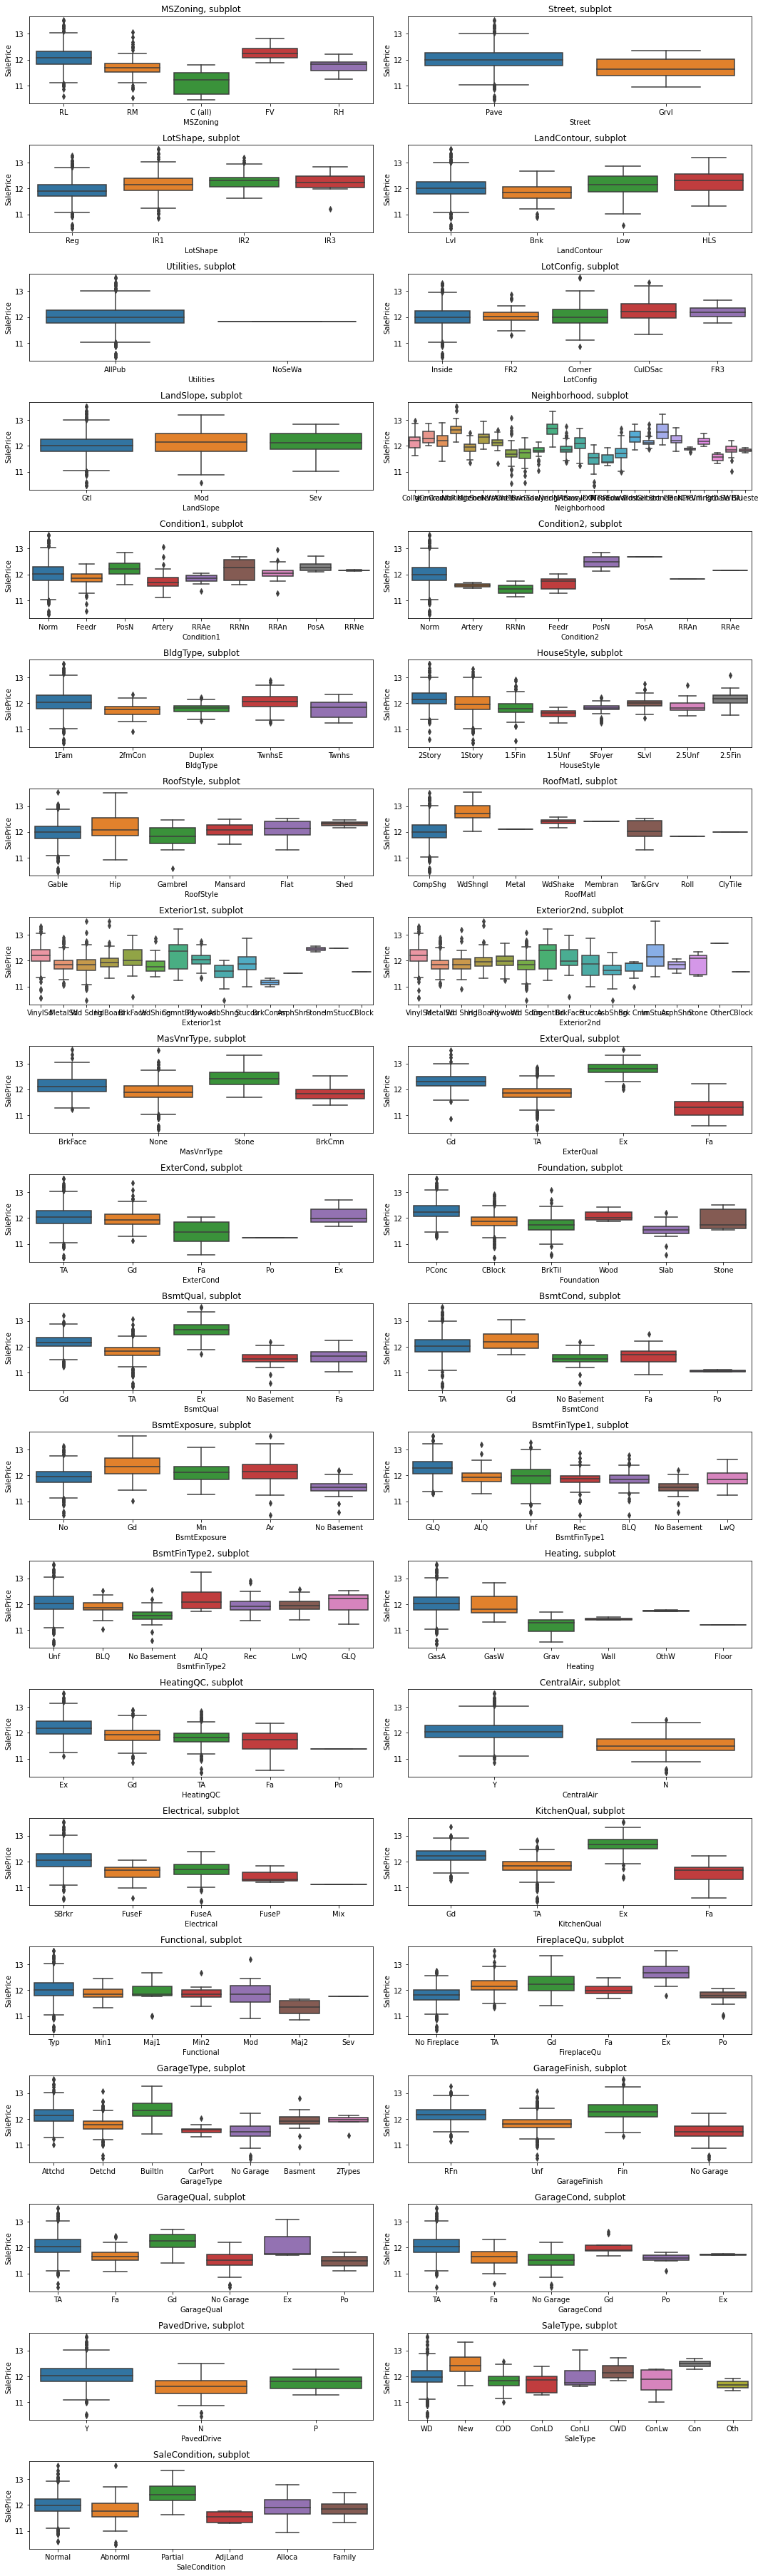

In [40]:
a = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in cat_col:
    plt.subplot(40, 2, a)
    plt.title('{}, subplot'.format(i))
    plt.xlabel(i)
    sns.boxplot(data_cat[i],data_cat['SalePrice'])
    a = a + 1

plt.tight_layout()
plt.show();

# Preparing Data for Modeling

In [41]:
# Get the dummy variables for categorical variables
data_cat = pd.get_dummies(data[cat_col], drop_first=True)
data_cat.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [44]:
data_cat.shape

(1460, 210)

In [45]:
# dropping original categories from data and adding dummies
data_drop = data.drop(cat_col,axis=1)
data_final = pd.concat([data_cat,data_drop], axis = 1)

In [46]:
data_final.shape


(1460, 238)

In [47]:
# Test Train Split

y = data_final['SalePrice']
X = data_final.drop(['SalePrice'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [50]:
X_train.shape

(1022, 237)

In [51]:
X_test.shape

(438, 237)

In [52]:
y_train.shape

(1022,)

In [53]:
y_test.shape

(438,)

In [55]:
# Since there are more than 200 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, n_features_to_select=100)            
rfe = rfe.fit(X_train, y_train)

In [56]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', False, 11),
 ('LotShape_IR2', False, 53),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 111),
 ('LandContour_HLS', True, 1),
 ('LandContour_Low', False, 105),
 ('LandContour_Lvl', True, 1),
 ('Utilities_NoSeWa', True, 1),
 ('LotConfig_CulDSac', False, 12),
 ('LotConfig_FR2', False, 60),
 ('LotConfig_FR3', False, 15),
 ('LotConfig_Inside', False, 62),
 ('LandSlope_Mod', False, 23),
 ('LandSlope_Sev', True, 1),
 ('Neighborhood_Blueste', True, 1),
 ('Neighborhood_BrDale', True, 1),
 ('Neighborhood_BrkSide', True, 1),
 ('Neighborhood_ClearCr', True, 1),
 ('Neighborhood_CollgCr', True, 1),
 ('Neighborhood_Crawfor', False, 119),
 ('Neighborhood_Edwards', True, 1),
 ('Neighborhood_Gilbert', True, 1),
 ('Neighborhood_IDOTRR', True, 1),
 ('Neighborhood_MeadowV', True, 1),
 ('Neighborhood_Mitchel', True, 1),
 ('Neighborhood_NAmes', True, 1),
 ('Neighborhood_NPkVill'

In [57]:
# Select the top 100 variables
col = X_train.columns[rfe.support_]
col

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LandContour_HLS', 'LandContour_Lvl',
       'Utilities_NoSeWa', 'LandSlope_Sev', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAn', 'Condition1_RRNn', 'Condition2_Norm',
       'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRNn',
       'RoofStyle_Gambrel', 'RoofMatl_CompShg', 'RoofMatl_Membran',
    

In [58]:
X_train.columns[~rfe.support_]


Index(['Street_Pave', 'LotShape_IR2', 'LotShape_Reg', 'LandContour_Low',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Mod', 'Neighborhood_Crawfor',
       ...
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'Property_Age'],
      dtype='object', length=137)

In [59]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [60]:
X_train_rfe = pd.DataFrame(X_train[col])


In [61]:
X_train_rfe.head()


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR3,LandContour_HLS,LandContour_Lvl,Utilities_NoSeWa,LandSlope_Sev,Neighborhood_Blueste,...,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial,LotArea,OverallQual,OverallCond,TotalBsmtSF,GrLivArea,BsmtFullBath,GarageCars
632,0,0,1,0,0,0,1,0,0,0,...,0,0,0,9.384378,7,1.791759,7.234898,7.252762,0.000000,2
208,0,0,1,0,0,0,0,0,0,0,...,0,1,0,9.572550,7,1.791759,7.054450,7.631917,0.693147,2
83,0,0,1,0,0,0,1,0,0,0,...,0,1,0,9.093020,5,1.791759,6.971669,6.971669,0.000000,2
1174,0,0,1,0,0,0,1,0,0,0,...,0,1,0,9.714806,6,2.197225,6.859615,7.760467,0.000000,2
250,0,0,1,0,0,0,1,0,0,0,...,0,1,0,8.585039,3,1.098612,6.591674,7.175490,0.000000,0


In [62]:
# Prediction


y_train_pred_lr = lm.predict(X_train)
y_test_pred_lr =  lm.predict(X_test)

# predicting RMSE 
lm_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
lm_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
print('Root Mean Square Error of train = ' + str(lm_train_rmse))
print('Root Mean Square Error of test = ' + str(lm_test_rmse))


# Predicting R squared 
lm_train_r2 = lm.score(X_train,y_train)
lm_test_r2 = lm.score(X_test,y_test)
print("R-Square for training data",lm_train_r2)
print("R-Square for test data",lm_test_r2)

Root Mean Square Error of train = 0.08497748988125975
Root Mean Square Error of test = 0.15415680647900426
R-Square for training data 0.9507248422388083
R-Square for test data 0.8742558609279271


In [ ]:
# There is difference in r2 of train and test data. This might be a case of overfitting

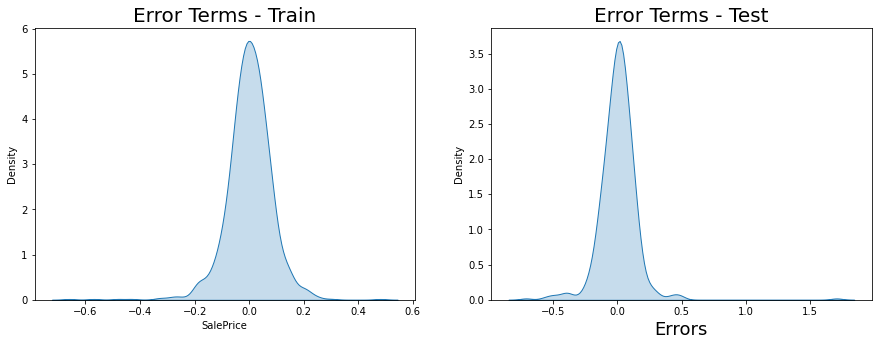

In [63]:
# Plot the histogram of the error terms

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5))

# train error term
sns.kdeplot((y_train - y_train_pred_lr), ax=ax1, shade = True)
ax1.set_title('Error Terms - Train', fontsize = 20)           
plt.xlabel('Errors', fontsize = 18)                        

# test error term
sns.kdeplot((y_test - y_test_pred_lr), ax = ax2, shade = True)
ax2.set_title('Error Terms - Test', fontsize = 20)          
plt.xlabel('Errors', fontsize = 18)    
plt.show()

In [ ]:
# The above plots are normally distributed

# Building Model With Ridge

In [64]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1022, 237)
y_train (1022,)


In [65]:
lm_ridge=Ridge()

# list of alphas to tune
params= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1,1.5,2,3,4,5,6,7,8,10]]}

ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0005, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.7,
                                   0.8, 1, 1.5, 2, 3, 4, 5, 6, 7, 8, 10]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.456788,0.897066,0.004829,0.002687,0.0005,{'alpha': 0.0005},-0.096952,-0.093580,-0.105071,-0.096437,...,-0.094268,0.008404,19,-0.054401,-0.056281,-0.054591,-0.058240,-0.060974,-0.056897,0.002464
1,0.030464,0.041820,0.003595,0.001055,0.001,{'alpha': 0.001},-0.096933,-0.093561,-0.105013,-0.096388,...,-0.094236,0.008391,18,-0.054406,-0.056290,-0.054610,-0.058254,-0.060991,-0.056910,0.002466
2,0.042087,0.066219,0.005299,0.002316,0.01,{'alpha': 0.01},-0.096610,-0.093217,-0.104130,-0.095806,...,-0.093755,0.008217,17,-0.054497,-0.056490,-0.054948,-0.058526,-0.061340,-0.057160,0.002521
3,0.006892,0.006879,0.007695,0.007369,0.1,{'alpha': 0.1},-0.094348,-0.090570,-0.101346,-0.094333,...,-0.091742,0.007653,16,-0.055272,-0.058608,-0.057440,-0.060531,-0.063411,-0.059052,0.002767
4,0.013017,0.005520,0.002792,0.002631,0.2,{'alpha': 0.2},-0.092831,-0.088628,-0.100278,-0.094286,...,-0.090635,0.007706,15,-0.055962,-0.059849,-0.058922,-0.061617,-0.064570,-0.060184,0.002857


In [67]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 8.36734581e-02,  8.92460551e-02,  5.36500536e-02,  2.77107348e-02,
       -2.16894451e-03,  4.03920926e-02, -6.73954043e-02,  1.59876395e-03,
        8.48244311e-02,  1.14259803e-02,  8.01676515e-02, -9.52599410e-02,
        2.43022219e-02, -2.73732612e-02, -5.71908452e-02, -1.20675771e-02,
        2.66324234e-02, -3.18267976e-03, -5.84235608e-03, -5.75444738e-03,
        5.19269499e-03,  2.99706081e-02, -1.90189099e-02,  1.07519862e-01,
       -1.06917660e-01, -3.56704306e-02, -5.00448194e-02, -8.50517896e-02,
       -5.31885984e-02, -5.48598110e-02,  9.52581524e-03, -4.50241335e-02,
        6.38381420e-02,  9.88885407e-02, -5.81763033e-02, -1.34319899e-02,
       -4.30287266e-02, -1.63237577e-03,  2.35394488e-02,  1.44297862e-01,
       -1.14067978e-02, -1.01614649e-02,  1.19480486e-03,  6.91392951e-02,
        2.32440601e-02,  4.77670290e-02, -4.29141569e-02,  5.12059305e-02,
       -3.46364602e-03,  7.51645425e-02,  3.95718540e-02,  5.09961448e-02,
        8.87779510e-02, -

In [68]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 7.262),
 ('MSZoning_FV', 0.084),
 ('MSZoning_RH', 0.089),
 ('MSZoning_RL', 0.054),
 ('MSZoning_RM', 0.028),
 ('Street_Pave', -0.002),
 ('LotShape_IR2', 0.04),
 ('LotShape_IR3', -0.067),
 ('LotShape_Reg', 0.002),
 ('LandContour_HLS', 0.085),
 ('LandContour_Low', 0.011),
 ('LandContour_Lvl', 0.08),
 ('Utilities_NoSeWa', -0.095),
 ('LotConfig_CulDSac', 0.024),
 ('LotConfig_FR2', -0.027),
 ('LotConfig_FR3', -0.057),
 ('LotConfig_Inside', -0.012),
 ('LandSlope_Mod', 0.027),
 ('LandSlope_Sev', -0.003),
 ('Neighborhood_Blueste', -0.006),
 ('Neighborhood_BrDale', -0.006),
 ('Neighborhood_BrkSide', 0.005),
 ('Neighborhood_ClearCr', 0.03),
 ('Neighborhood_CollgCr', -0.019),
 ('Neighborhood_Crawfor', 0.108),
 ('Neighborhood_Edwards', -0.107),
 ('Neighborhood_Gilbert', -0.036),
 ('Neighborhood_IDOTRR', -0.05),
 ('Neighborhood_MeadowV', -0.085),
 ('Neighborhood_Mitchel', -0.053),
 ('Neighborhood_NAmes', -0.055),
 ('Neighborhood_NPkVill', 0.01),
 ('Neighborhood_NWAmes', -0.045),
 ('Nei

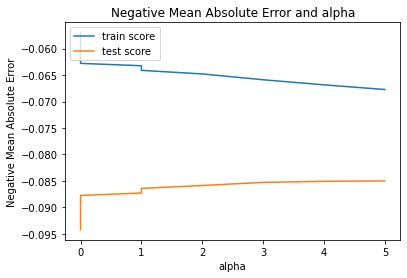

In [69]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [70]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

Ridge(alpha=2)

In [71]:
# Predictictions on train and test set
y_pred_train_ridge_gcv = lm.predict(X_train)
y_pred_test_ridge_gcv = lm.predict(X_test)

# Predicting RMSE
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge_gcv))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge_gcv))
print('Root Mean Square Error train = ' + str(ridge_train_rmse))
print('Root Mean Square Error test = ' + str(ridge_test_rmse))

# Predicting R squared
ridge_train_r2 = lm.score(X_train,y_train)
ridge_test_r2 = lm.score(X_test,y_test)
print("R-Square for training data",ridge_train_r2)
print("R-Square for testing data",ridge_test_r2)

Root Mean Square Error train = 0.09675239653374432
Root Mean Square Error test = 0.13797748646708707
R-Square for training data 0.9361231209532038
R-Square for testing data 0.8992653689080385


In [ ]:
#Its a Better model compared to Linear Regression. The train and test r2 scores are matching a bit

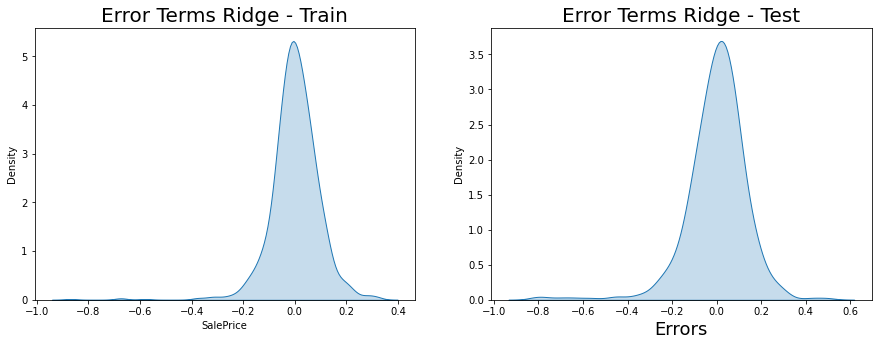

In [72]:
# Plot the histogram of the error terms

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5))

# train error term
sns.kdeplot((y_train - y_pred_train_ridge_gcv), ax=ax1, shade = True)
ax1.set_title('Error Terms Ridge - Train', fontsize = 20)          
plt.xlabel('Errors', fontsize = 18) 

# test error term
sns.kdeplot((y_test - y_pred_test_ridge_gcv), ax = ax2, shade = True)
ax2.set_title('Error Terms Ridge - Test', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

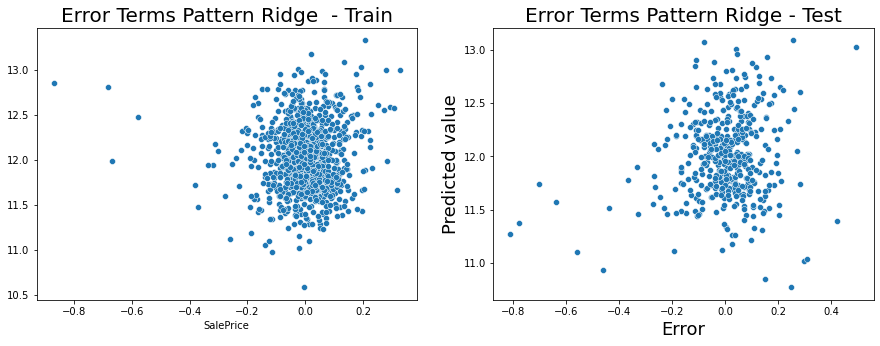

In [73]:
# Plot the scatterplot to check if any pattern is there in error terms.

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5))

# train error term
sns.scatterplot((y_train - y_pred_train_ridge_gcv), y_pred_train_ridge_gcv, ax=ax1)
ax1.set_title('Error Terms Pattern Ridge  - Train', fontsize = 20)         
plt.xlabel('Error', fontsize = 18)                       
plt.ylabel('Predicted value', fontsize = 18) 

# test error term
sns.scatterplot((y_test - y_pred_test_ridge_gcv), y_pred_test_ridge_gcv,  ax = ax2)
ax2.set_title('Error Terms Pattern Ridge - Test', fontsize = 20)          
plt.xlabel('Error', fontsize = 18)  # X-label
plt.ylabel('Predicted value', fontsize = 18) 
plt.show()


In [ ]:
#  Error terms are normally distributed and there is no pattern observed

In [74]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,7.262
223,GrLivArea,0.308
215,OverallCond,0.236
80,RoofMatl_WdShngl,0.195
40,Neighborhood_StoneBr,0.144
207,SaleCondition_Alloca,0.108
24,Neighborhood_Crawfor,0.108
74,RoofMatl_CompShg,0.102
204,SaleType_Oth,0.101
34,Neighborhood_NridgHt,0.099


In [75]:
## There would be few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE.head(10)

,Variable,Coeff
0,constant,7.262
1,MSZoning_FV,0.084
2,MSZoning_RH,0.089
3,MSZoning_RL,0.054
4,MSZoning_RM,0.028
5,Street_Pave,-0.002
6,LotShape_IR2,0.040
7,LotShape_IR3,-0.067
8,LotShape_Reg,0.002
9,LandContour_HLS,0.085


# Building Model With Lasso

In [77]:
lasso =Lasso()
params= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1]]}

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0005, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.7,
                                   0.8, 1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [78]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.372520,0.669907,0.004411,0.002249,0.0005,{'alpha': 0.0005},-0.087206,-0.077112,-0.099164,-0.086081,...,-0.084058,0.009676,2,-0.066941,-0.071549,-0.068694,-0.070289,-0.074478,-0.070390,0.002563
1,0.023274,0.004575,0.002491,0.002038,0.001,{'alpha': 0.001},-0.086387,-0.076340,-0.098872,-0.085527,...,-0.083637,0.009536,1,-0.072654,-0.075195,-0.072969,-0.075111,-0.078061,-0.074798,0.001941
2,0.019093,0.003386,0.004862,0.006366,0.01,{'alpha': 0.01},-0.117437,-0.104105,-0.122847,-0.102330,...,-0.108313,0.010289,3,-0.102696,-0.104784,-0.102816,-0.106387,-0.107781,-0.104893,0.001986
3,0.004453,0.006511,0.009616,0.008072,0.1,{'alpha': 0.1},-0.161264,-0.159220,-0.177435,-0.157549,...,-0.162855,0.007387,4,-0.157355,-0.162978,-0.159060,-0.159998,-0.164348,-0.160748,0.002563
4,0.008266,0.006975,0.008233,0.006235,0.2,{'alpha': 0.2},-0.197815,-0.197440,-0.212901,-0.193451,...,-0.199763,0.006755,5,-0.197489,-0.198013,-0.194720,-0.199337,-0.199907,-0.197893,0.001810


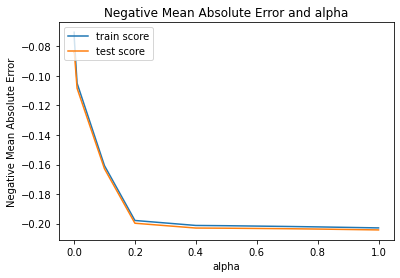

In [79]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
# The optimal value of alpha from the above plot is 0.01

In [80]:
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [81]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 8.909),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', 0.0),
 ('Utilities_NoSeWa', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', -0.0),
 ('LotConfig_Inside', -0.0),
 ('LandSlope_Mod', 0.0),
 ('LandSlope_Sev', 0.0),
 ('Neighborhood_Blueste', -0.0),
 ('Neighborhood_BrDale', -0.0),
 ('Neighborhood_BrkSide', 0.0),
 ('Neighborhood_ClearCr', 0.0),
 ('Neighborhood_CollgCr', -0.0),
 ('Neighborhood_Crawfor', 0.0),
 ('Neighborhood_Edwards', -0.0),
 ('Neighborhood_Gilbert', -0.0),
 ('Neighborhood_IDOTRR', -0.0),
 ('Neighborhood_MeadowV', -0.0),
 ('Neighborhood_Mitchel', -0.0),
 ('Neighborhood_NAmes', -0.0),
 ('Neighborhood_NPkVill', -0.0),
 ('Neighborhood_NWAmes', -0.0),
 ('Neighborhood_NoRidge', 0.0),
 ('Neighborhood_NridgHt', 0.0),


In [82]:
# predicting on train and test data
y_pred_train_lasso_gcv = lasso.predict(X_train)
y_pred_test_lasso_gcv =  lasso.predict(X_test)

# Predicting RMSE
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_lasso_gcv))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso_gcv))
print('Root Mean Square Error train = ' + str(lasso_train_rmse))
print('Root Mean Square Error test = ' + str(lasso_test_rmse))

# Predicting R squared
lasso_train_r2 = lasso.score(X_train,y_train)
lasso_test_r2 = lasso.score(X_test,y_test)
print("R-Square for training data",lasso_train_r2)
print("R-Square for training data",lasso_test_r2)

Root Mean Square Error train = 0.15326557015540868
Root Mean Square Error test = 0.1689130571680515
R-Square for training data 0.8397088898614052
R-Square for training data 0.8490306494948935


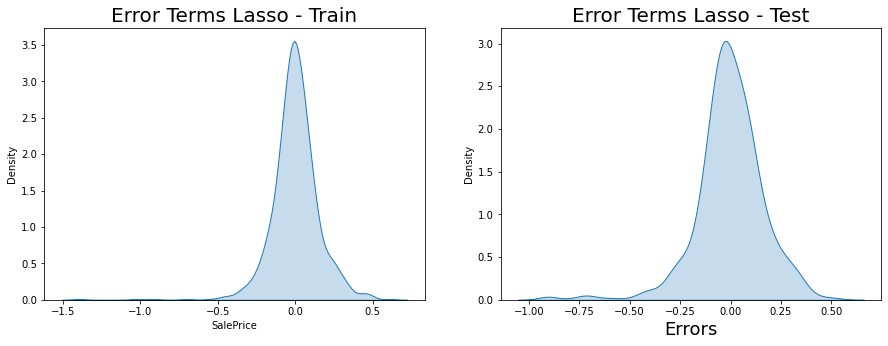

In [83]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5))

# train error term
sns.kdeplot((y_train - y_pred_train_lasso_gcv), ax=ax1, shade = True)
ax1.set_title('Error Terms Lasso - Train', fontsize = 20)        
plt.xlabel('Errors', fontsize = 18)                        

# test error term
sns.kdeplot((y_test - y_pred_test_lasso_gcv), ax = ax2, shade = True)
ax2.set_title('Error Terms Lasso - Test', fontsize = 20)         
plt.xlabel('Errors', fontsize = 18)
plt.show()

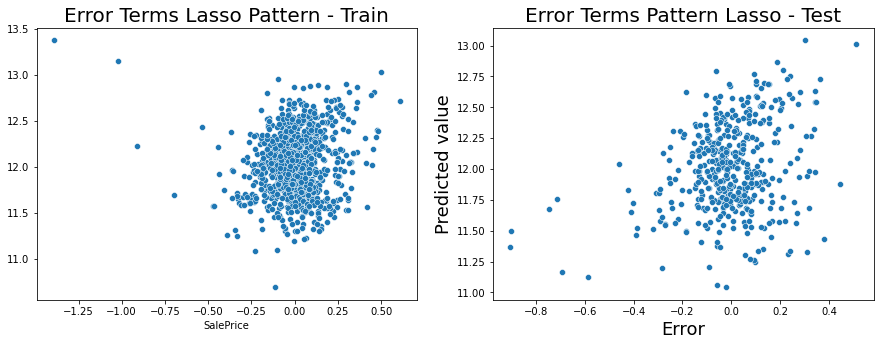

In [84]:
# Plot the scatterplot to check if any pattern is there in error terms.

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5))

# train error term
sns.scatterplot((y_train - y_pred_train_lasso_gcv), y_pred_train_lasso_gcv, ax=ax1)
ax1.set_title('Error Terms Lasso Pattern - Train', fontsize = 20)          
plt.xlabel('Error', fontsize = 18)                      
plt.ylabel('Predicted value', fontsize = 18)

# test error term
sns.scatterplot((y_test - y_pred_test_lasso_gcv), y_pred_test_lasso_gcv,  ax = ax2)
ax2.set_title('Error Terms Pattern Lasso - Test', fontsize = 20)          
plt.xlabel('Error', fontsize = 18)  
plt.ylabel('Predicted value', fontsize = 18)
plt.show()

In [ ]:
# we observe that there is no pattern in Error terms observed

In [85]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [86]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']

# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,8.909
223,GrLivArea,0.177
214,OverallQual,0.114
213,LotArea,0.090
217,BsmtFinSF1,0.014
...,...,...
85,Exterior1st_CemntBd,0.000
237,Property_Age,-0.002
157,HeatingQC_TA,-0.007
165,KitchenQual_TA,-0.018


In [87]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,8.909
223,GrLivArea,0.177
214,OverallQual,0.114
213,LotArea,0.090
217,BsmtFinSF1,0.014
220,TotalBsmtSF,0.013
227,BedroomAbvGr,0.011
225,FullBath,0.011
236,ScreenPorch,0.010
234,OpenPorchSF,0.007


# Model Comparison 

In [88]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['RMSE (Train)','RMSE (Test)','R2 Score (Train)','R2 Score (Test)'], 
        'Linear Regression': [lm_train_rmse,lm_test_rmse,lm_train_r2,lm_test_r2],
        'Ridge Regression': [ridge_train_rmse,ridge_test_rmse,ridge_train_r2,ridge_test_r2],
         'Lasso Regression': [lasso_train_rmse,lasso_test_rmse,lasso_train_r2,lasso_test_r2] 
        }

lr_metric = pd.DataFrame(lr_table)
lr_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,RMSE (Train),0.084977,0.096752,0.153266
1,RMSE (Test),0.154157,0.137977,0.168913
2,R2 Score (Train),0.950725,0.936123,0.839709
3,R2 Score (Test),0.874256,0.899265,0.849031


In [89]:
#From the above table, we can conclude that Lasso Regression model is the best among the three as the accuracy is high and error is less compared to other models.